## Exercise 2: Logistic Regression
### ==================== Part 1: Plotting ====================

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


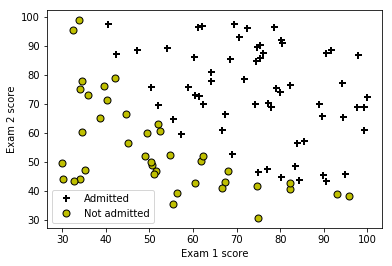

In [1]:
from ex2 import *
import pandas as pd

## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.
data = pd.read_csv('ex2data1.txt', header=None)
X = data.iloc[:, :2]
y = data.iloc[:, 2]

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

%matplotlib inline
plotData(np.array(X), np.array(y))

# Put some labels
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'])
plt.show()

### ============ Part 2: Compute Cost and Gradient ============
代价函数$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}{-y^{(i)}\log\left(h_\theta(x^{(i)})\right) - (1 - y^{(i)})\log\left(1 - h_\theta(x^{(i)})\right)} = -\frac{1}{m}\left(y^T\log\left(g(X\theta)\right) + (\vec{1} - y)^T\log\left(\vec{1} - g(X\theta)\right)\right)$$
梯度$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}{\left(h_\theta(x^{(i)} - y^{(i)}\right)x_j^{(i)}}$$
$$\nabla J(\theta) = \frac{1}{m}X^T\left(g(X\theta - y)\right)$$

In [2]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X.insert(0, None, 1)

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)
X = np.array(X)
y = np.array(y)

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

print(f'Cost at initial theta (zeros): {cost:f}')
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros): ')
print(f' {grad} ')
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print(f'\nCost at test theta: {cost:f}')
print('Expected cost (approx): 0.218')
print('Gradient at test theta: ')
print(f' {grad} ')
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 [ -0.1      -12.009217 -11.262842] 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628

Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 [0.042903 2.566234 2.646797] 
Expected gradients (approx):
 0.043
 2.566
 2.647


### ============= Part 3: Optimizing using fminunc  =============

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 [-25.161333   0.206232   0.201472] 
Expected theta (approx):
 -25.161
 0.206
 0.201


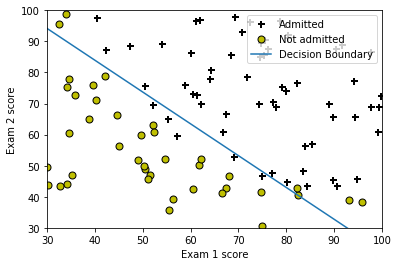

In [3]:
#  Set options for fminunc
fun = lambda t: costFunction(t, X, y)[0]
x0 = np.zeros(n + 1)
jac = lambda t: costFunction(t, X, y)[1]
options = {'disp': True, 'maxiter': 400}

#  Run fminunc to obtain the optimal theta
#  This function will return theta and the cost
from scipy import optimize as opt
import warnings
warnings.filterwarnings('ignore')
res = opt.minimize(fun, x0, jac=jac, options=options)
theta = res.x
cost = res.fun

# Print theta to screen
print(f'Cost at theta found by fminunc: {cost:f}')
print('Expected cost (approx): 0.203')
print('theta: ')
print(f' {theta} ')
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')
    
# Plot Boundary
plotDecisionBoundary(theta, X, y)

# Put some labels
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
# plt.legend(['Admitted', 'Not admitted'])
plt.show()

### ============== Part 4: Predict and Accuracies ==============

In [4]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

prob = sigmoid(np.matmul(np.array([1, 45, 85]), theta))
print('For a student with scores 45 and 85, we predict an admission '
      f'probability of {prob:f}')
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)

print(f'Train Accuracy: {(p == y).mean() * 100:f}')
print('Expected accuracy (approx): 89.0')

For a student with scores 45 and 85, we predict an admission probability of 0.776291
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.000000
Expected accuracy (approx): 89.0


## Exercise 2: Regularized Logistic Regression

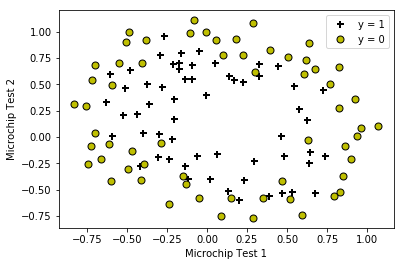

In [5]:
## Load Data
#  The first two columns contains the X values and the third column
#  contains the label (y).

data = pd.read_csv('ex2data2.txt', header=None)
X = data.iloc[:, :2]
y = data.iloc[:, 2]

plotData(np.array(X), np.array(y))

# Put some labels
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'])
plt.show()

### =========== Part 1: Regularized Logistic Regression ============
正则化的代价函数和梯度为$$J(\theta) = \frac{1}{m}\left[\sum_{i=1}^{m}{-y^{(i)}\log\left(h_\theta(x^{(i)})\right) - (1 - y^{(i)})\log\left(1 - h_\theta(x^{(i)})\right)} + \frac{\lambda}{2}\sum_{i=1}^{n}{\theta_j^2}\right] = -\frac{1}{m}\left(y^T\log\left(g(X\theta)\right) + (\vec{1} - y)^T\log\left(\vec{1} - g(X\theta)\right)\right) + \frac{\lambda}{2m}\theta^T\theta$$
$$\frac{\partial}{\partial\theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}{\left(h_\theta(x^{(i)} - y^{(i)}\right)x_j^{(i)}} + \frac{\lambda}{m}\theta_j$$
$$\nabla J(\theta) = \frac{1}{m}X^T\left(g(X\theta - y)\right) + \frac{\lambda}{m}\theta$$

In [6]:
# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X.iloc[:, 0], X.iloc[:, 1])

# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_);

print(f'Cost at initial theta (zeros): {cost:f}')
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print(f' {grad[:5]} ')
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print(f'\nCost at test theta (with lambda = 10): {cost:f}')
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
print(f' {grad[:5]} ')
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 [8.474576e-03 1.878809e-02 7.777119e-05 5.034464e-02 1.150133e-02] 
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115

Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 [0.346045 0.161352 0.194796 0.226863 0.092186] 
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


### ============= Part 2: Regularization and Accuracies =============

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


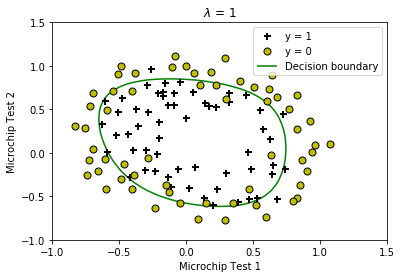

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.1 (approx)


In [7]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1;

# Set Options
fun = lambda t: costFunctionReg(t, X, y, lambda_)[0]
jac = lambda t: costFunctionReg(t, X, y, lambda_)[1]
options = {'disp': True, 'maxiter': 400}

# Optimize
res = opt.minimize(fun, initial_theta, jac=jac, options=options)
theta = res.x
J = res.fun
exit_flag = res.status

# Plot Boundary
plotDecisionBoundary(theta, X, y);
plt.title(f'$\lambda$ = {lambda_:g}')

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
plt.show()

# Compute accuracy on our training set
p = predict(theta, X)

print(f'Train Accuracy: {(p == y).mean() * 100:f}')
print('Expected accuracy (with lambda = 1): 83.1 (approx)')

### Different Regularization Parameters

         Current function value: 0.263499
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401
Train Accuracy: 88.135593
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Train Accuracy: 83.050847
Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 21
         Function evaluations: 22
         Gradient evaluations: 22
Train Accuracy: 74.576271
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Train Accuracy: 61.016949


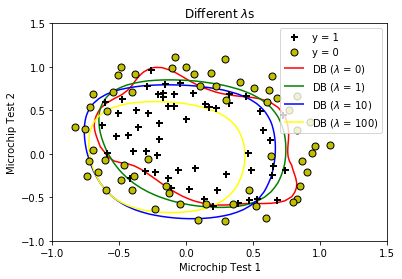

In [8]:
# Plot Data
plotData(X[:, 1:], y)
# Set Options
fun = lambda t, lambda_: costFunctionReg(t, X, y, lambda_)[0]
jac = lambda t, lambda_: costFunctionReg(t, X, y, lambda_)[1]
options = {'disp': True, 'maxiter': 400}
lambdas = [0, 1, 10, 100]
colors = ['red', 'green', 'blue', 'yellow']
for lambda_, color in zip(lambdas, colors):
    # Initialize fitting parameters
    initial_theta = np.zeros(X.shape[1])
    # Optimize
    res = opt.minimize(fun, initial_theta, args=(lambda_,), jac=jac, options=options)
    theta = res.x
    J = res.fun
    exit_flag = res.status
    
    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    # Evaluate z = theta * x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
            z[i, j] = np.matmul(mapFeature(u[i:i + 1], v[j:j + 1]), theta)

    u, v = np.meshgrid(u, v)
    #
    # Plot z = 0
    # Notice you need to specify the range[0, 0]
    cs = plt.contour(u, v, z.transpose(), [0], linewidth=2, colors=color)
    cs.collections[0].set_label('')
    # Compute accuracy on our training set
    p = predict(theta, X)
    print(f'Train Accuracy: {(p == y).mean() * 100:f}')

plt.title('Different $\lambda$s')

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0'] + [f'DB ($\lambda$ = {i})' for i in lambdas])
plt.show()

可以看到当$\lambda = 0$时迭代还没有收敛，并且决策边界变得很扭曲，说明没有经过正则化时出现了过拟合；<br>
而当$\lambda = 100$时迭代了7步就收敛了，这时的决策边界相当圆滑，但较多的数据点分类不正确（准确率仅有61%），说明正则化程度过高会导致欠拟合。
###### 以上部分函数代码在[ex2.py](https://github.com/StevenPZChan/ml_dl_coursera_Andrew_Ng/blob/master/machine-learning-ex2/ex2.py)中

### 总结：`numpy`和`scipy`里面的数学工具还是挺多挺实用的。学会了`contour`的标注方法。